<a href="https://colab.research.google.com/github/MOHDABUZARSUFIYAN/Oaisis-intership-task/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time


In [181]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [182]:

df = df.dropna(how="any", axis=1)
df.columns = ['target', 'message']


In [183]:
df

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [184]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [185]:
df.tail()

,target,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [186]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [187]:
df.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [188]:
df.shape


(5572, 2)

In [189]:
df['message_len'] = df['message'].apply(lambda x: len(x.split(' ')))
df.head()


,target,message,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [190]:

df['message'].drop_duplicates(inplace = True)


In [191]:

max(df['message_len'])


171

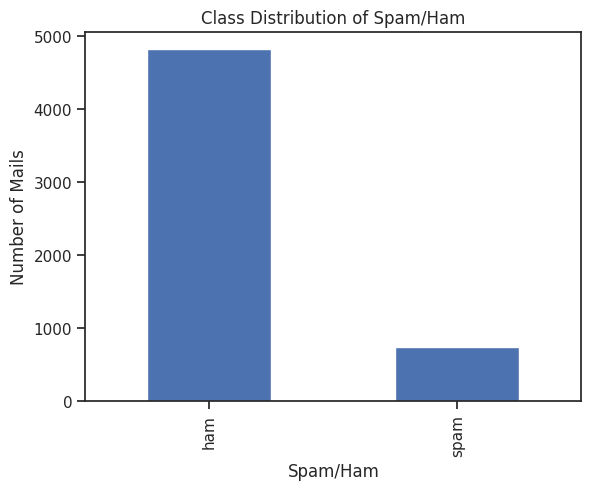

In [192]:
# Create a bar plot of the class distribution
class_counts = df['target'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of Mails')
plt.show()


In [193]:

from collections import Counter
import re

import nltk
from nltk.corpus import stopwords


In [194]:

balance_counts = df.groupby('target')['target'].agg('count').values
balance_counts


array([4825,  747])

In [195]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['message'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)


In [196]:
df['message_clean'] = df['message'].apply(clean_text)
df.head()


,target,message,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,11,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah think goe usf live around though


In [197]:
# Split the text into individual words
words = all_text.split()


In [198]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words


[('to', 2134),
 ('you', 1622),
 ('I', 1466),
 ('a', 1327),
 ('the', 1197),
 ('and', 857),
 ('in', 798),
 ('is', 781),
 ('i', 742),
 ('u', 692),
 ('for', 644),
 ('my', 628),
 ('of', 591),
 ('your', 560),
 ('me', 557),
 ('on', 487),
 ('have', 474),
 ('2', 453),
 ('that', 421),
 ('it', 396),
 ('are', 396),
 ('call', 376),
 ('or', 373),
 ('be', 362),
 ('at', 359),
 ('with', 349),
 ('not', 340),
 ('will', 330),
 ('get', 326),
 ('can', 304),
 ('U', 299),
 ('so', 294),
 ('ur', 293),
 ("I'm", 286),
 ('but', 282),
 ('&lt;', 276),
 ('You', 263),
 ('from', 256),
 ('4', 249),
 ('do', 243),
 ('up', 241),
 ('just', 236),
 ('if', 235),
 ('.', 235),
 ('go', 234),
 ('when', 233),
 ('know', 224),
 ('this', 223),
 ('like', 222),
 ('we', 221),
 ('all', 216),
 ('out', 207),
 ('got', 204),
 ('was', 200),
 ('come', 198),
 ('now', 190),
 ('?', 187),
 ('am', 186),
 ('...', 163),
 ('want', 157),
 ('Call', 155),
 ('by', 155),
 ('time', 154),
 ('about', 150),
 ('send', 150),
 ('only', 147),
 ('then', 146),
 ('goi

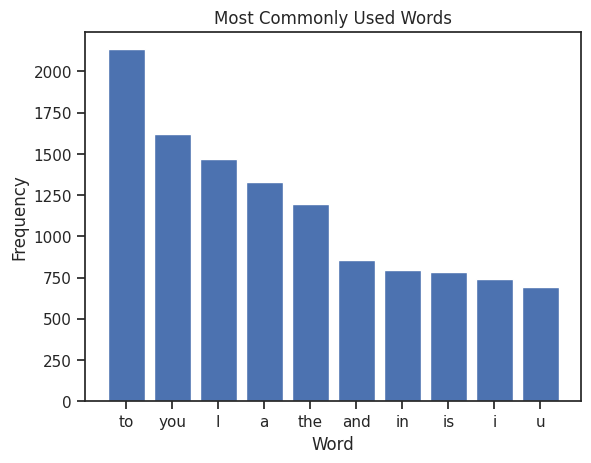

In [199]:

# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()


In [200]:

# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text


In [201]:

stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

df['message_clean'] = df['message_clean'].apply(remove_stopwords)
df.head()


,target,message,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,11,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah think goe usf live around though


In [202]:

%%time

tqdm.pandas()

df['cleaned_text'] = df['message'].progress_apply(clean_text)


  0%|          | 0/5572 [00:00<?, ?it/s]

CPU times: user 11.1 s, sys: 1.29 s, total: 12.4 s
Wall time: 12.8 s


In [203]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text


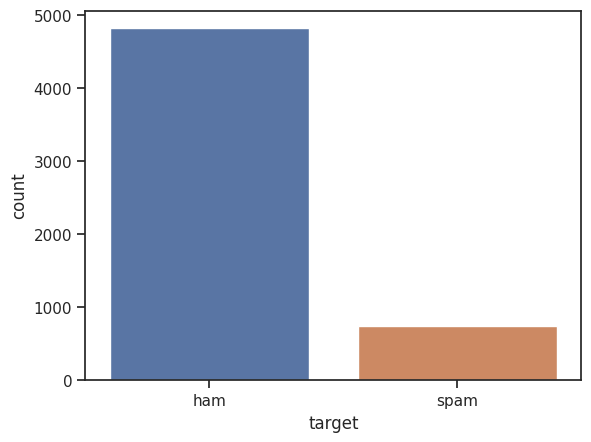

In [204]:
sns.countplot(x='target',data=df,)
plt.show()

In [205]:
# Create the Bag of Words model
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['target']


In [206]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
clf = LogisticRegression()


In [208]:
clf.fit(X_train, y_train)


LogisticRegression()

In [209]:

# evaluate the classifier on the test set
y_pred = clf.predict(X_test)


In [210]:
y_pred


array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [211]:

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.9775784753363229


In [212]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



                             **THANK YOU**










